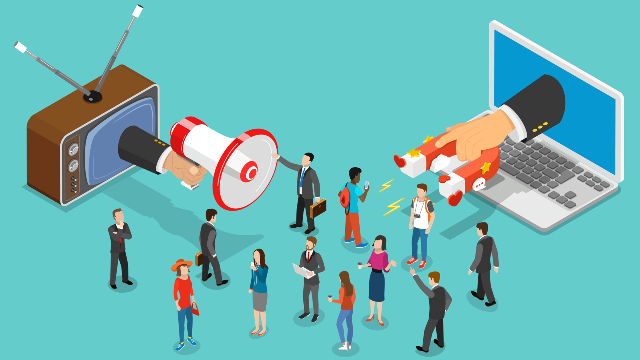

***By using the data they have, companies determine customer habits and can develop special marketing and communication strategies for different customer classes by making classifications with various methods.***

***As a data set, a data set in which the age, gender, country of the customers of a mobile game company, the operating system of the device they have and the amount of expenditure are kept in separate variables was used.***

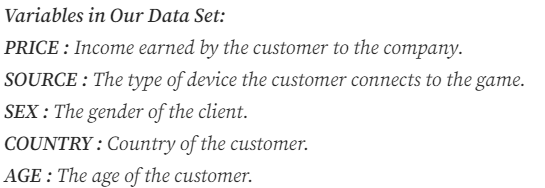

In [1]:
### Let’s import the dataset
import pandas as pd
persona = pd.read_csv('/kaggle/input/persona-dataset/persona.csv')
persona.head()

,PRICE,SOURCE,SEX,COUNTRY,AGE
0,39,android,male,bra,17
1,39,android,male,bra,17
2,49,android,male,bra,17
3,29,android,male,tur,17
4,49,android,male,tur,17


In [2]:
#### Let's examine the unique values and frequencies of the source and price variables.
persona['PRICE'].unique()
persona['PRICE'].value_counts()

29    1305
39    1260
49    1031
19     992
59     212
9      200
Name: PRICE, dtype: int64

In [3]:
persona['SOURCE'].unique()
persona['SOURCE'].value_counts()

android    2974
ios        2026
Name: SOURCE, dtype: int64

In [4]:
### How many sales were made in which country?
persona['COUNTRY'].value_counts()
persona.groupby('COUNTRY')['PRICE'].count()

COUNTRY
bra    1496
can     230
deu     455
fra     303
tur     451
usa    2065
Name: PRICE, dtype: int64

In [5]:
### How much total return was obtained from sales by country?
persona.groupby('COUNTRY').agg({'PRICE':'sum'})

,PRICE
COUNTRY,
bra,51354
can,7730
deu,15485
fra,10177
tur,15689
usa,70225


In [6]:
### Grouping country and resource variables and averaging by price
persona.groupby(['COUNTRY','SOURCE']).agg({'PRICE':'mean'})

PRICE
COUNTRY SOURCE            
bra     android  34.387029
        ios      34.222222
can     android  33.330709
        ios      33.951456
deu     android  33.869888
        ios      34.268817
fra     android  34.312500
        ios      32.776224
tur     android  36.229437
        ios      33.272727
usa     android  33.760357
        ios      34.371703

In [7]:
### Grouping country, source, sex and age variables and averaging by price
agg_df = persona.groupby(['COUNTRY','SOURCE','SEX','AGE']).agg({'PRICE':'mean'})

### We sorted it from the largest to the smallest according to the PRICE variable
agg_df = agg_df.sort_values('PRICE',ascending=False)

agg_df.head()

,,,,PRICE
COUNTRY,SOURCE,SEX,AGE,
bra,android,male,46,59.0
usa,android,male,36,59.0
fra,android,female,24,59.0
usa,ios,male,32,54.0
deu,android,female,36,49.0


In [8]:
### Variables are currently in index state, making them column
agg_df = agg_df.reset_index()

In [9]:
###Converting AGE variable to categorical variable and assigning new variable as AGE_CAT
agg_df["AGE_CAT"] = pd.cut(agg_df["AGE"], bins=[0, 18, 23, 30, 40, 70], labels=["0_18", "19_23", "24_30", "31_40", "41_70"])
agg_df.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE,AGE_CAT
0,bra,android,male,46,59.0,41_70
1,usa,android,male,36,59.0,31_40
2,fra,android,female,24,59.0,24_30
3,usa,ios,male,32,54.0,31_40
4,deu,android,female,36,49.0,31_40


**Combine the country, gender, device operating system, and newly created age classes of customers into a single variable:**

In [10]:
### Combining the variables other than AGE and PRICE and assigning them to a new variable
agg_df["customers_level_based"] = ['_'.join(i).upper() for i in agg_df.drop(["AGE", "PRICE"], axis=1).values]
agg_df.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE,AGE_CAT,customers_level_based
0,bra,android,male,46,59.0,41_70,BRA_ANDROID_MALE_41_70
1,usa,android,male,36,59.0,31_40,USA_ANDROID_MALE_31_40
2,fra,android,female,24,59.0,24_30,FRA_ANDROID_FEMALE_24_30
3,usa,ios,male,32,54.0,31_40,USA_IOS_MALE_31_40
4,deu,android,female,36,49.0,31_40,DEU_ANDROID_FEMALE_31_40


In [11]:
### Creating a new dataset
agg_df = agg_df[['customers_level_based','PRICE']]
agg_df.head()

,customers_level_based,PRICE
0,BRA_ANDROID_MALE_41_70,59.0
1,USA_ANDROID_MALE_31_40,59.0
2,FRA_ANDROID_FEMALE_24_30,59.0
3,USA_IOS_MALE_31_40,54.0
4,DEU_ANDROID_FEMALE_31_40,49.0


In [12]:
### segmenting customer profiles
agg_df["SEGMENT"]=pd.qcut(agg_df["PRICE"],4,labels=["D","C","B","A"])
agg_df= agg_df.groupby("customers_level_based").agg({"PRICE": "mean"})
agg_df = agg_df.reset_index()
agg_df.head()

,customers_level_based,PRICE
0,BRA_ANDROID_FEMALE_0_18,35.645303
1,BRA_ANDROID_FEMALE_19_23,34.077340
2,BRA_ANDROID_FEMALE_24_30,33.863946
3,BRA_ANDROID_FEMALE_31_40,34.898326
4,BRA_ANDROID_FEMALE_41_70,36.737179


****With the outputs we receive, we can predict the possible returns on potential customer profiles. As a result of these estimations, we can implement our marketing and communication strategies that we determined according to the segments and adjust the budget according to the potential return amounts.****

In [13]:
### Find out which segments the new customer profile
new_user_1 = "TUR_ANDROID_FEMALE_31_40"
agg_df[agg_df["customers_level_based"] == new_user_1]

,customers_level_based,PRICE
72,TUR_ANDROID_FEMALE_31_40,41.833333


***With the outputs we receive, we can predict the possible returns on potential customer profiles. As a result of these estimations, we can implement our marketing and communication strategies that we determined according to the segments and adjust the budget according to the potential return amounts.***